# Week 4: Applied Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [2]:
# see the pre-defined styles provided
plt.style.available

['tableau-colorblind10',
 'fivethirtyeight',
 'seaborn-pastel',
 'seaborn-colorblind',
 'dark_background',
 'seaborn-paper',
 'seaborn-poster',
 'ggplot',
 'bmh',
 'seaborn-bright',
 'seaborn-muted',
 'seaborn',
 'grayscale',
 'fast',
 'seaborn-notebook',
 'classic',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'seaborn-talk',
 'seaborn-white',
 'seaborn-darkgrid',
 'seaborn-deep',
 '_classic_test',
 'seaborn-dark-palette',
 'Solarize_Light2',
 'seaborn-dark']

Let's use the `seaborn-colorblind` style.

In [3]:
plt.style.use('seaborn-colorblind')

# `pandas`
## DataFrame.plot

Explore the built-in plotting capabilities within pandas.

In [3]:
np.random.seed(123)

n=365
df = pd.DataFrame({'A': np.random.randn(n).cumsum(0), 
                   'B': np.random.randn(n).cumsum(0) + 20,
                   'C': np.random.randn(n).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=n))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


To see what the data looks like more visually, just use the built-in `plot` method. This produces a line graph with labels. The colors are set by the style.

<IPython.core.display.Javascript object>


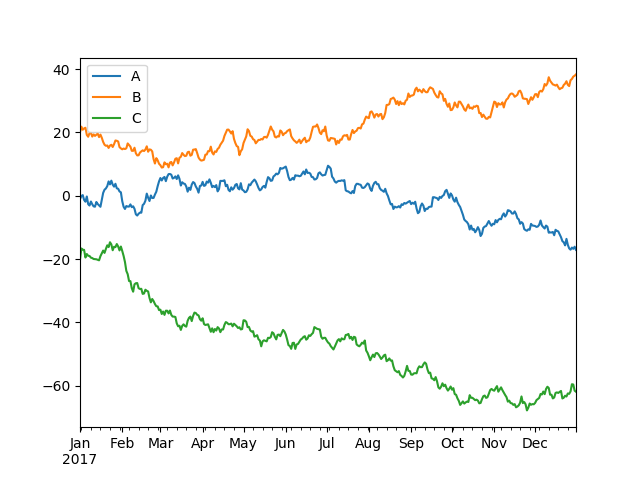

In [4]:
df.plot()

There are other kinds of plots too. Try a scatter plot. Specify which columns to plot as the first two input arguments.

<IPython.core.display.Javascript object>


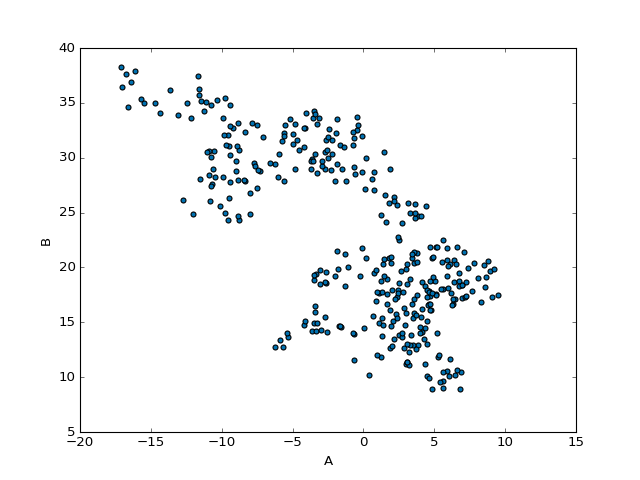

In [7]:
df.plot('A','B',kind='scatter')

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


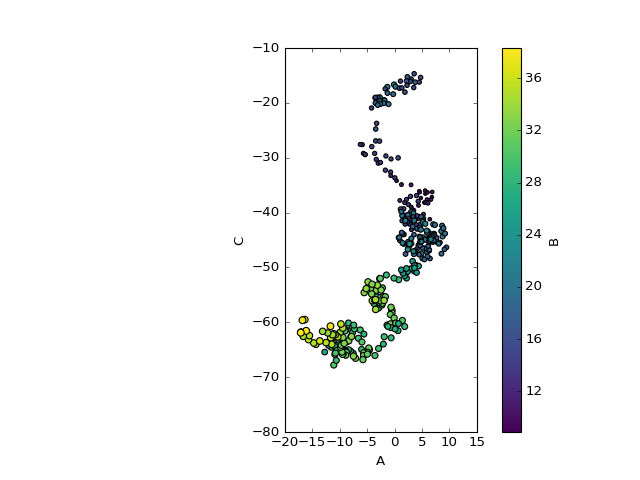

In [16]:
ax= df.plot.scatter('A','C',c='B',s=df['B'],colormap='viridis')
ax.set_aspect('equal')

This makes the scale of the x- and y-axes to be equal. In this case, the range of `A` is much smaller than the range of `C`, so the x-axis is narrower.

Now try box plots, histograms, and [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) plots. 

<IPython.core.display.Javascript object>


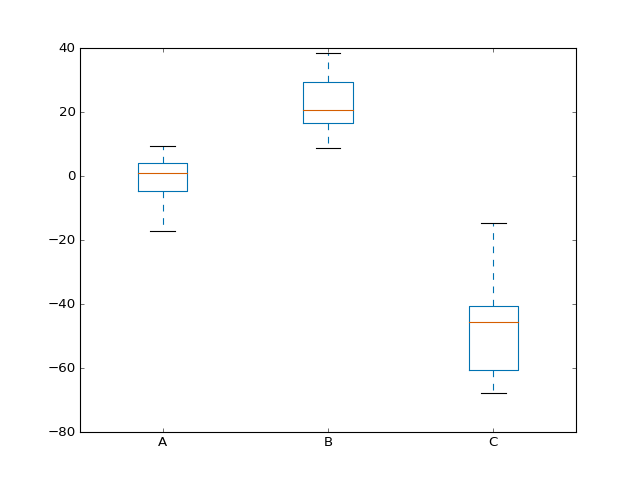

<IPython.core.display.Javascript object>


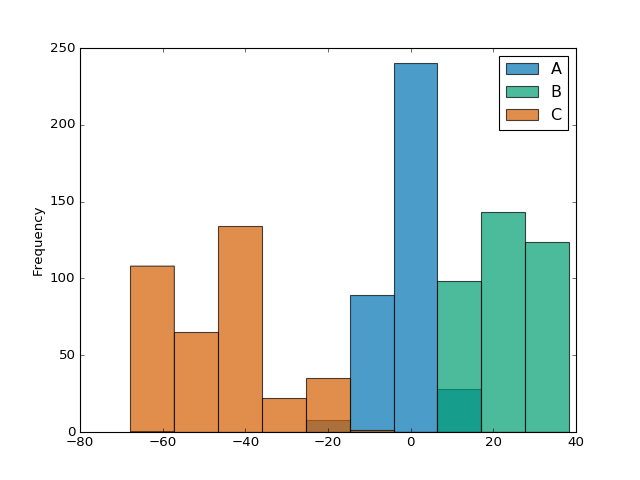

<IPython.core.display.Javascript object>


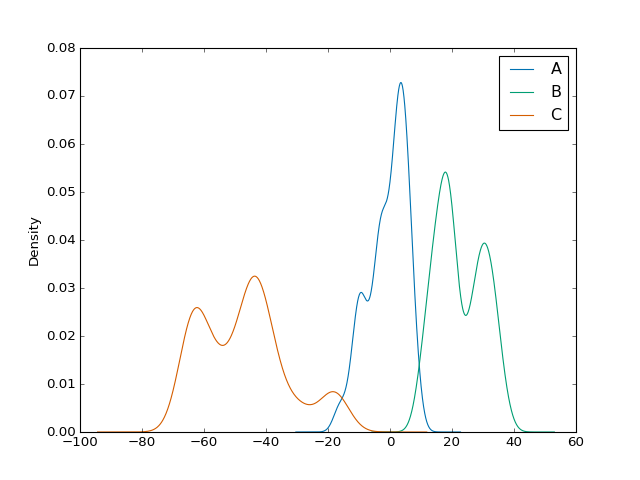

In [18]:
df.plot.box();
df.plot.hist(alpha=0.7);
df.plot.kde();

## pandas.tools.plotting

Load the [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [21]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>


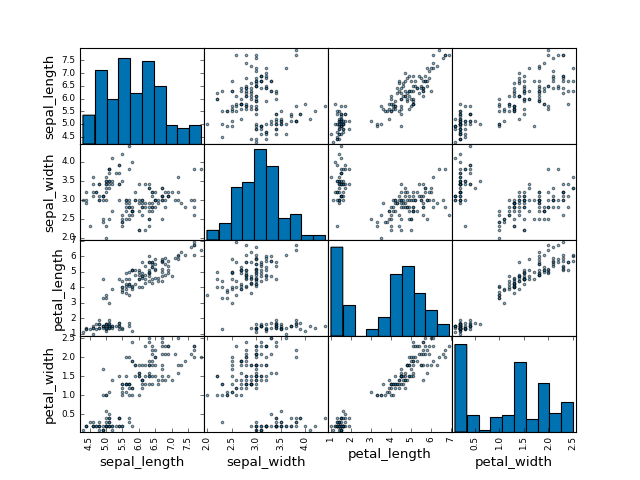

In [22]:
pd.tools.plotting.scatter_matrix(iris);

This looks impressive, but this is nothing more than a 4x4 gridplot with histograms and scatter plots. We already know how to make this plot.

Now look at a parallel coordinates plots, which is a way of visualizing high-dimensional multivariate data. Each variable in the dataset corresponds to an equally-spaced line. The values of each variable are then connected by lines between for each individual observation. Coloring the lines by class allows the user to easily see patterns or clustering.

<IPython.core.display.Javascript object>


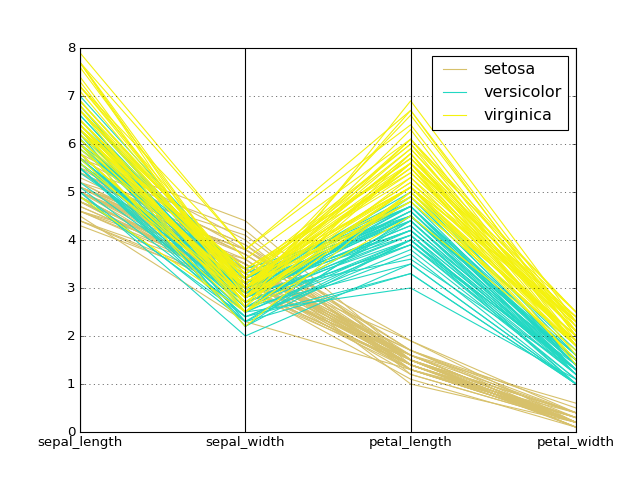

In [24]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'species');

# Seaborn

Seaborn is a wrapper around matplotlib that adds styles to make plots more visually appealing. 

In [4]:
np.random.seed(1234)
v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

Let's make a histogram comparing the two. Set `alpha=0.7` so that the two histograms don't cover each other up.

<IPython.core.display.Javascript object>


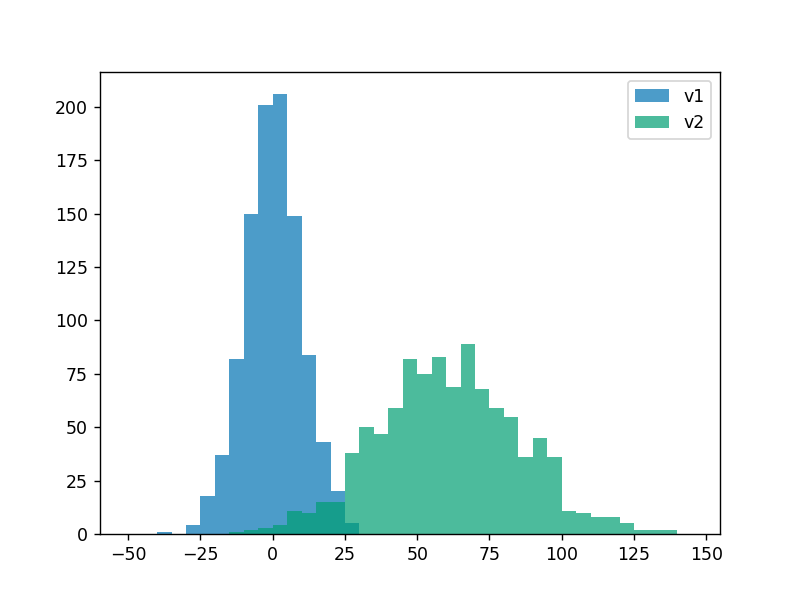

In [5]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

Even just importing seaborn completely changes the way the distribution looks.

<IPython.core.display.Javascript object>


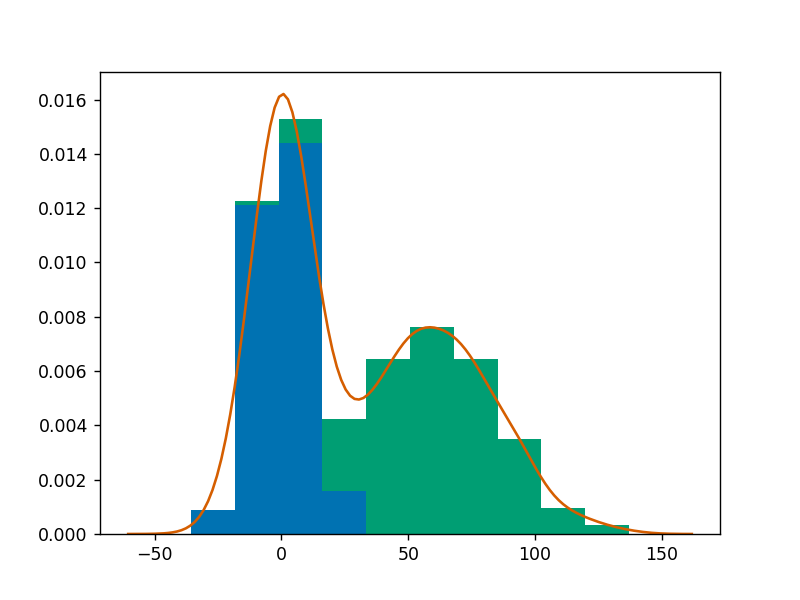

C:\Users\pfsch\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\pfsch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [6]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


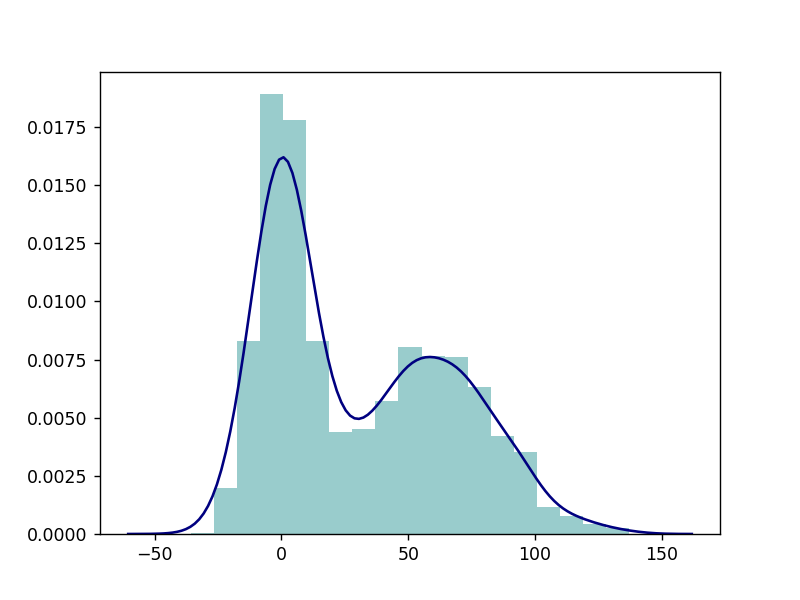

C:\Users\pfsch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [7]:
plt.figure()
sns.distplot(v3, hist_kws = {'color':'Teal'}, kde_kws={'color':'Navy'})

Look at the joint plot. It creates a scatter plot along the histograms along each variable.

<IPython.core.display.Javascript object>


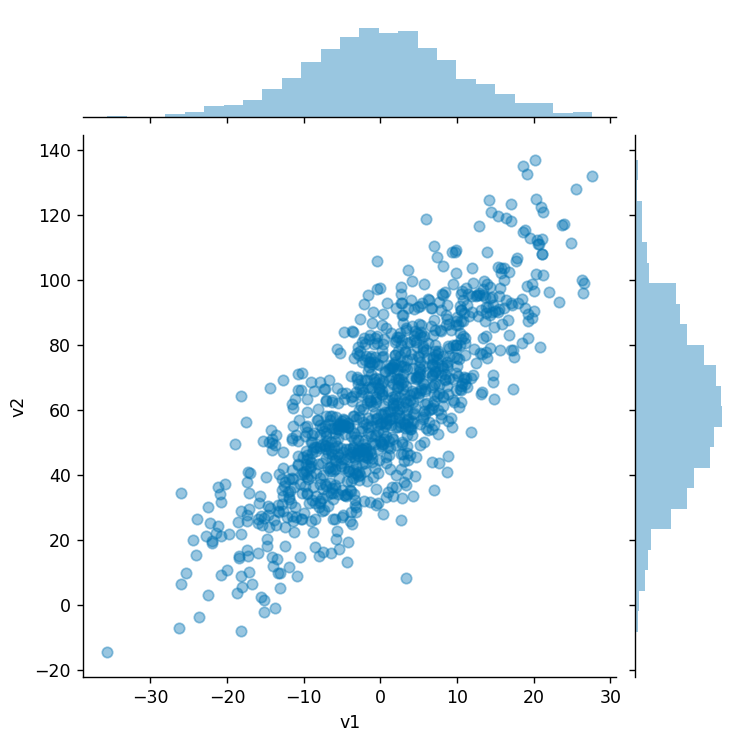

C:\Users\pfsch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [8]:
sns.jointplot(v1,v2,alpha=0.4)

This shows that v1 and v2 are normally distributed variables that appear to be positively correlated.

<IPython.core.display.Javascript object>


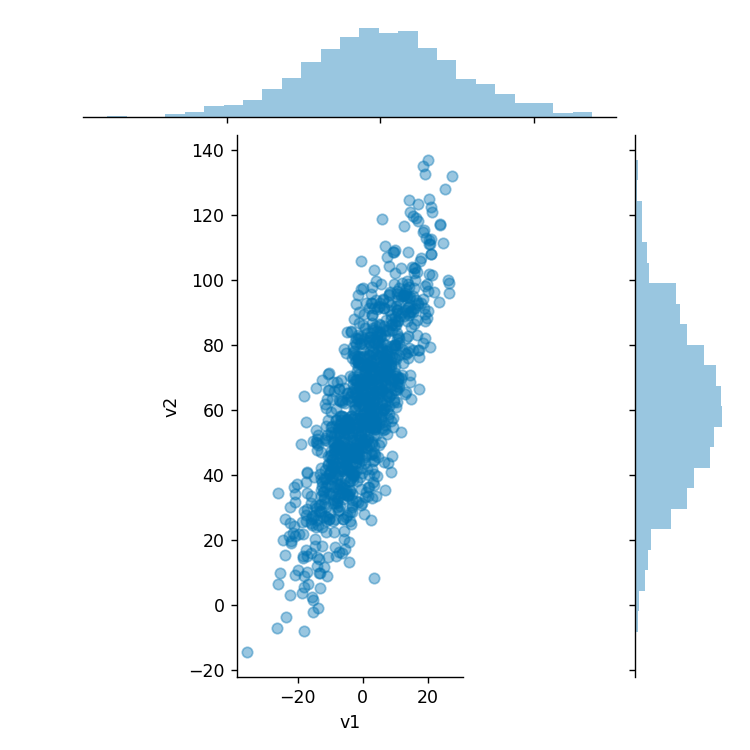

C:\Users\pfsch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [9]:
grid = sns.jointplot(v1,v2,alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


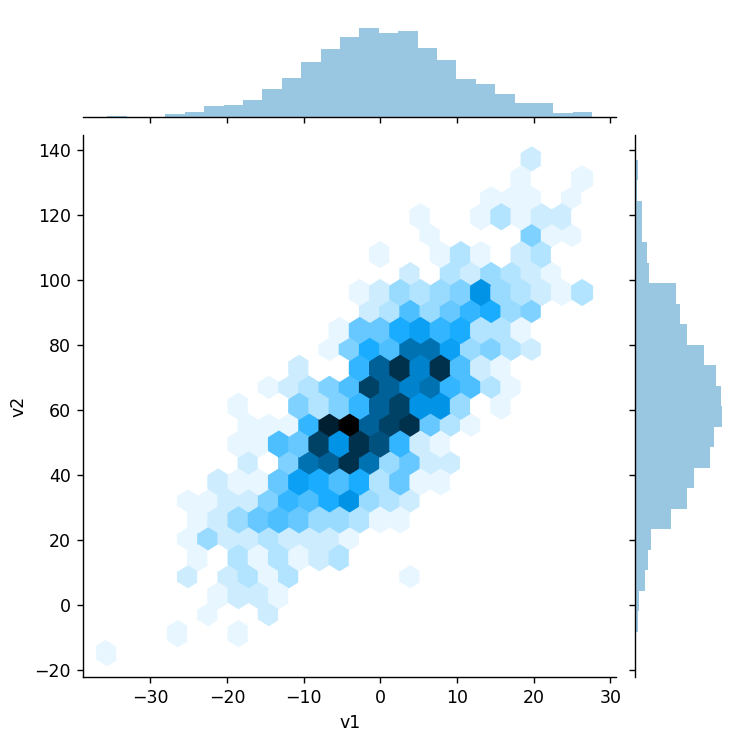

C:\Users\pfsch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [10]:
sns.jointplot(v1,v2,kind='hex')

<IPython.core.display.Javascript object>


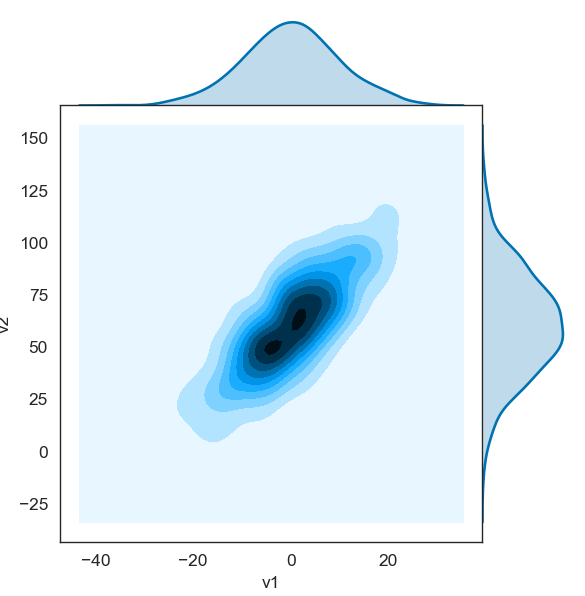

C:\Users\pfsch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [11]:
sns.set_style('white')

sns.jointplot(v1,v2,kind='kde',space=0)

In [21]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>


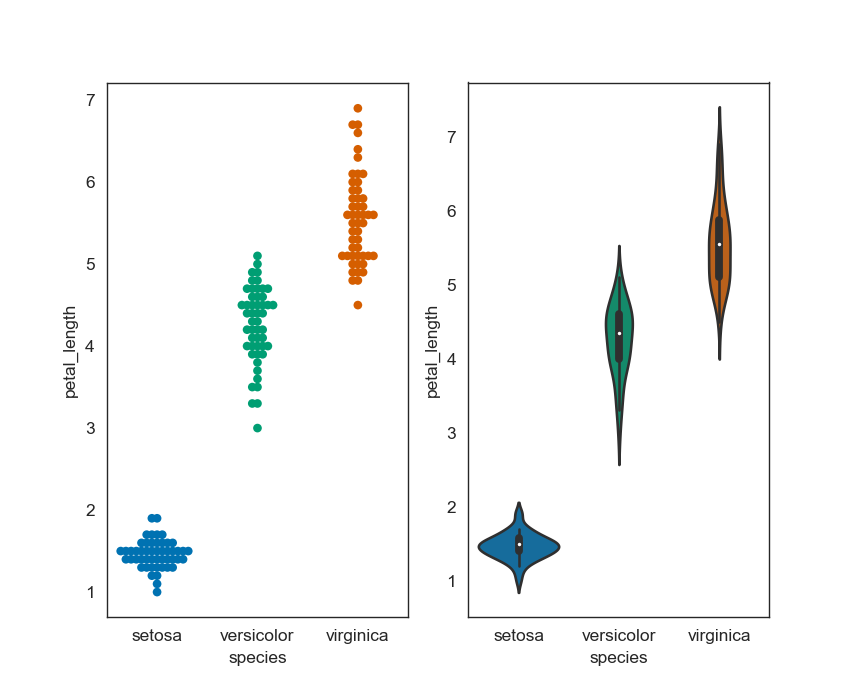

C:\Users\pfsch\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [24]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.swarmplot('species','petal_length',data=iris)
plt.subplot(122)
sns.violinplot('species', 'petal_length', data=iris)